In [1]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


# Import Libraries

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)

### Loading Datasets

In [9]:
data1 = pd.read_csv("/kaggle/input/crime-rate-prediction/Chicago_Crimes_2005_to_2007.csv",on_bad_lines="skip",engine="python")
data2 = pd.read_csv("/kaggle/input/crime-rate-prediction/Chicago_Crimes_2008_to_2011.csv",on_bad_lines="skip",engine="python")
data3 = pd.read_csv("/kaggle/input/crime-rate-prediction/Chicago_Crimes_2012_to_2017.csv",on_bad_lines="skip",engine="python")

ID: Unique identifier for the crime incident.
Case Number: Records Division Number assigned to the incident.
Date: Date when the incident occurred.
Block: Block address of the incident.
IUCR: The Illinois Uniform Crime Reporting code.
Primary Type: The primary description of the crime according to the IUCR code.
Description: Secondary description of the incident.
Location Description: Description of the location where the incident occurred.
Arrest: True or False if the convict was arrested.
Domestic: True or False if the incident was domestic-related.
Beat: A beat is the smallest police geographic area — each beat has a dedicated police beat car.
District: District where the incident occurred.
Ward: The City Council district where the incident occurred.
Community Area: Chicago has 77 community areas.
FBI Code: Crime classification according to FBI’s National Incident-Based Reporting System (NIBRS).
X Coordinate: The x coordinate of the incident.
Y Coordinate: The y coordinate of the incident.
Year: Year the incident occurred.
Updated On: Date and time the record was last updated.
Latitude: The latitude of the incident.
Longitude: The longitude of the incident.
Location: The location of the incident


### Concatenating DataFrames into One Unified Dataset

In [10]:
df=pd.concat([data1,data2,data3])

 ### Previewing the First Few Rows of the DataFrame

In [11]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


### Checking the Dimensions of the DataFrame

In [12]:
df.shape

(6017767, 23)

### Displaying the Number of Rows and Columns in the DataFrame

In [13]:
print("Number of Row is :",df.shape[0])
print("Number of Columns is :",df.shape[1])

Number of Row is : 6017767
Number of Columns is : 23


### Displaying the Summary of the DataFrame

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6017767 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool(2), 

### Checking for Missing Values in the DataFrame

In [15]:
df.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 7
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1974
Arrest                      0
Domestic                    0
Beat                        0
District                   89
Ward                       92
Community Area           1844
FBI Code                    0
X Coordinate            74882
Y Coordinate            74882
Year                        0
Updated On                  0
Latitude                74882
Longitude               74882
Location                74882
dtype: int64

### Visualizing Missing Values with a Heatmap

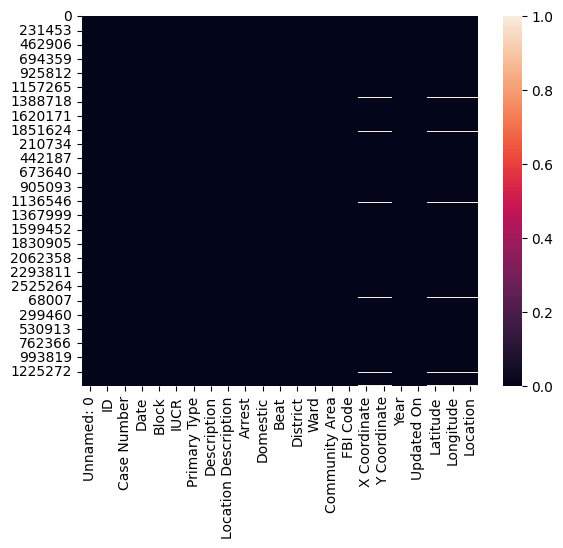

In [16]:
sns.heatmap(df.isnull())
plt.show()

### Counting Duplicate Rows in the DataFrame

In [17]:
df.duplicated().sum()

1681211

In [18]:
df

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"


### Listing the Column Names of the DataFrame

In [19]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

### Selecting Specific Columns from the DataFrame

In [20]:
df=df[['ID','Date','Primary Type','Location Description','Arrest','Domestic']]

### Previewing the First Few Rows of the DataFrame After Column Selection

In [21]:
df.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic
0,4673626,04/02/2006 01:00:00 PM,OTHER OFFENSE,RESIDENCE,False,False
1,4673627,02/26/2006 01:40:48 PM,NARCOTICS,SIDEWALK,True,False
2,4673628,01/08/2006 11:16:00 PM,ASSAULT,OTHER,False,False
3,4673629,04/05/2006 06:45:00 PM,BATTERY,RESIDENCE,False,False
4,4673630,02/17/2006 09:03:14 PM,NARCOTICS,ALLEY,True,False


### Checking for Missing Values in the Selected Columns

In [22]:
df.isnull().sum()

ID                         0
Date                       0
Primary Type               0
Location Description    1974
Arrest                     0
Domestic                   0
dtype: int64

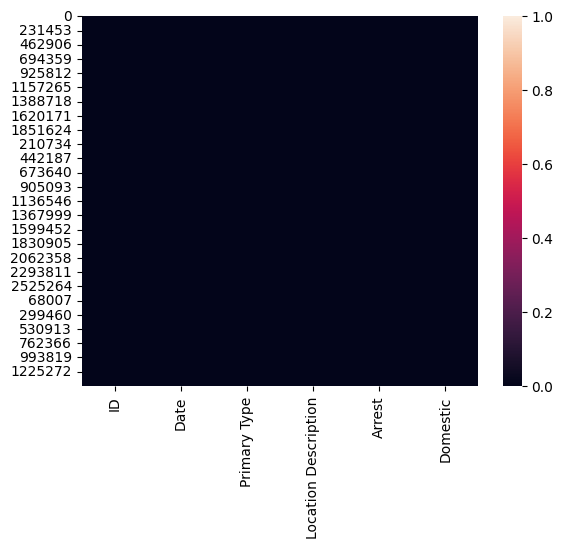

In [23]:
sns.heatmap(df.isnull())
plt.show()

# Data Cleaning

### Dropping Rows with Missing Values from the DataFrame

In [24]:
df=df.dropna()

### Verifying if Missing Values Remain After Dropping Rows

In [25]:
df.isnull().sum()

ID                      0
Date                    0
Primary Type            0
Location Description    0
Arrest                  0
Domestic                0
dtype: int64

# Data Preprocessing 

### Converting the 'Date' Column to Datetime Format

In [26]:
df["Date"]=pd.to_datetime(df["Date"],format = '%m/%d/%Y %I:%M:%S %p')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6015793 entries, 0 to 1456713
Data columns (total 6 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(2)
memory usage: 241.0+ MB


# Data Analysis

### Counting and Plotting the Distribution of 'Primary Type' Values

Primary Type
THEFT                                1244395
BATTERY                              1079174
CRIMINAL DAMAGE                       702696
NARCOTICS                             674829
BURGLARY                              369053
OTHER OFFENSE                         368168
ASSAULT                               360242
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229463
DECEPTIVE PRACTICE                    223947
CRIMINAL TRESPASS                     171594
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48402
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                58

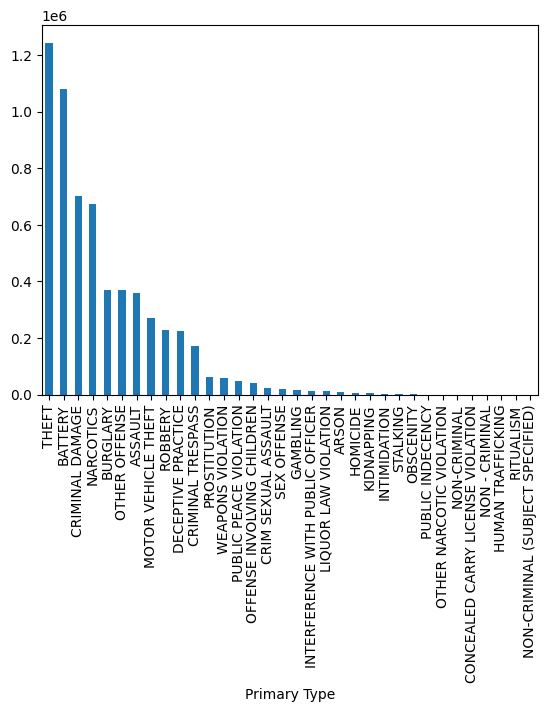

In [28]:
print(df["Primary Type"].value_counts())
print("*******************************************")
df["Primary Type"].value_counts().plot(kind="bar")
plt.show()

### Counting Arrests in 'THEFT' Cases

In [29]:
df[df["Primary Type"]=="THEFT"]["Arrest"].value_counts()

Arrest
False    1103085
True      141310
Name: count, dtype: int64

### Creating a Crosstab of 'Primary Type' vs 'Arrest'

In [30]:
pd.crosstab(df["Primary Type"],df["Arrest"])

Arrest,False,True
Primary Type,,
ARSON,8141,1128
ASSAULT,274805,85437
BATTERY,832174,247000
BURGLARY,348404,20649
CONCEALED CARRY LICENSE VIOLATION,13,77
CRIM SEXUAL ASSAULT,19366,3423
CRIMINAL DAMAGE,654405,48291
CRIMINAL TRESPASS,48790,122804
DECEPTIVE PRACTICE,187075,36872


### Visualizing the Crosstab of 'Primary Type' vs 'Arrest' with a Bar Plot

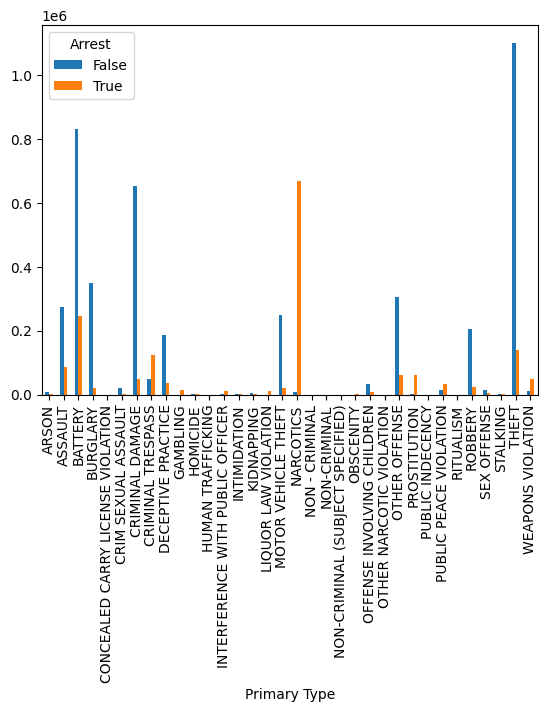

In [31]:
pd.crosstab(df["Primary Type"],df["Arrest"]).plot(kind="bar")
plt.show()

### Displaying and Plotting the Top 10 Most Common 'Location Description' Values

Location Description
STREET                            1517724
RESIDENCE                          991977
SIDEWALK                           674793
APARTMENT                          668298
OTHER                              216154
PARKING LOT/GARAGE(NON.RESID.)     166331
ALLEY                              137094
SCHOOL, PUBLIC, BUILDING           128852
RESIDENCE-GARAGE                   119619
VEHICLE NON-COMMERCIAL             107554
Name: count, dtype: int64
************************************************


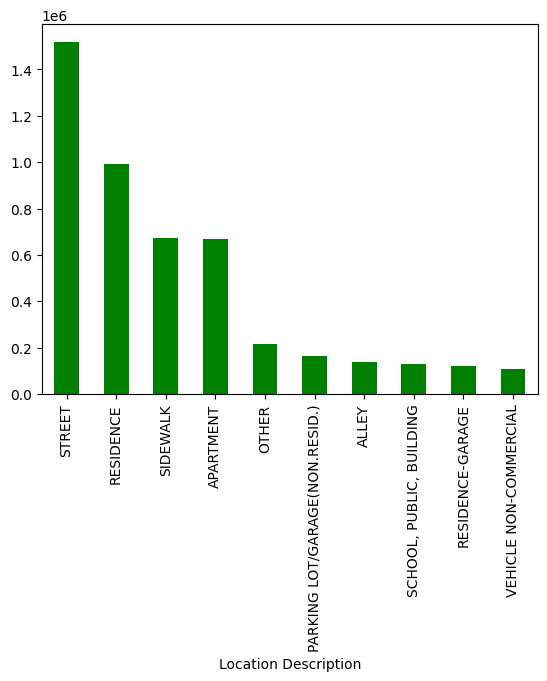

In [32]:
print(df["Location Description"].value_counts().head(10))
print("************************************************")
df["Location Description"].value_counts().head(10).plot(kind="bar",color=("g"))
plt.show()

### Counting Arrests for 'STREET' Location Description

In [33]:
df[df['Location Description']=="STREET"]['Arrest'].value_counts()

Arrest
False    1093718
True      424006
Name: count, dtype: int64

### Creating a Crosstab of 'Primary Type' vs 'Location Description'

In [34]:
pd.crosstab(df["Primary Type"],df["Location Description"])

Location Description,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,...,VACANT LOT/LAND,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VESTIBULE,WAREHOUSE,WOODED AREA,YARD,YMCA
Primary Type,,,,,,,,,,,,,,,,,,,,,
ARSON,174,0,0,0,1,0,0,0,0,0,...,122,0,0,2792,52,0,13,0,0,0
ASSAULT,74,24,31,13,34,19,24,54,13,1,...,278,0,7,1467,94,0,267,0,0,0
BATTERY,334,91,38,26,91,24,37,87,21,6,...,1378,1,47,11251,469,0,469,0,0,0
BURGLARY,2081,0,0,0,2,0,0,0,0,0,...,4441,0,1,144,29,0,1997,0,0,0
CONCEALED CARRY LICENSE VIOLATION,1,0,0,0,0,1,0,1,0,0,...,1,0,0,2,0,0,0,0,0,0
CRIM SEXUAL ASSAULT,341,0,0,0,0,0,0,0,0,0,...,145,2,9,1107,37,0,7,0,0,0
CRIMINAL DAMAGE,1110,8,25,17,70,22,130,28,17,2,...,2773,2,13,18786,619,0,1109,0,0,0
CRIMINAL TRESPASS,1742,2,62,2,48,19,29,688,7,2,...,788,1,0,1072,73,0,345,0,0,0
DECEPTIVE PRACTICE,94,16,87,9,131,8,37,56,14,10,...,106,2,35,566,227,0,310,0,0,0


### Setting the 'Date' Column as the Index with a Datetime Index

In [35]:
df.index=pd.DatetimeIndex(df["Date"])

In [36]:
df.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic
Date,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,OTHER OFFENSE,RESIDENCE,False,False
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,NARCOTICS,SIDEWALK,True,False
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,ASSAULT,OTHER,False,False
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,BATTERY,RESIDENCE,False,False
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,NARCOTICS,ALLEY,True,False


### Plotting the Number of Crimes Per Year

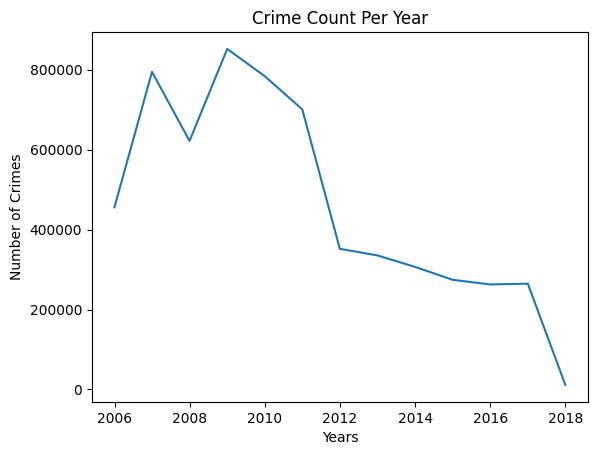

In [37]:
plt.plot(df.resample("Y").size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")
plt.show()

### Plotting the Number of Crimes Per Month

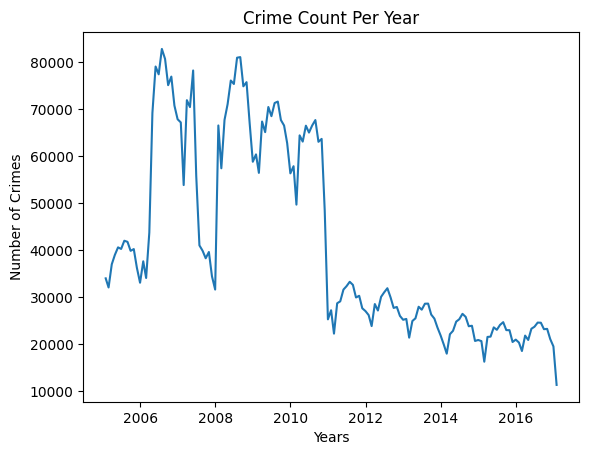

In [38]:
plt.plot(df.resample('M').size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")
plt.show()

### Creating a DataFrame for Monthly Crime Counts Using Resampling

In [39]:
df_prophet=pd.DataFrame(df.resample("M").size().reset_index())
df_prophet

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36968
3,2005-04-30,38963
4,2005-05-31,40570
...,...,...
140,2016-09-30,23176
141,2016-10-31,23243
142,2016-11-30,21077
143,2016-12-31,19517


### Renaming Columns for the Monthly Crime Count DataFrame

In [40]:
df_prophet.columns =['Date','Crime Count']
df_prophet

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36968
3,2005-04-30,38963
4,2005-05-31,40570
...,...,...
140,2016-09-30,23176
141,2016-10-31,23243
142,2016-11-30,21077
143,2016-12-31,19517


# Building Model 

### Renaming Columns to Fit Prophet Model Requirements

In [41]:
df_prophet=df_prophet.rename(columns={'Date':'ds','Crime Count':'y'})

### Displaying the DataFrame with Monthly Crime Counts Ready for Prophet Model

In [42]:
df_prophet

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36968
3,2005-04-30,38963
4,2005-05-31,40570
...,...,...
140,2016-09-30,23176
141,2016-10-31,23243
142,2016-11-30,21077
143,2016-12-31,19517


### Importing the Prophet Model for Time Series Forecasting

In [43]:
from prophet import Prophet

### Fitting the Prophet Model on the Monthly Crime Count Data

In [44]:
m = Prophet()
m.fit(df_prophet)

18:41:22 - cmdstanpy - INFO - Chain [1] start processing
18:41:22 - cmdstanpy - INFO - Chain [1] done processing


### Making Future Predictions for Monthly Crime Counts Using the Prophet Model

In [45]:
pred=m.make_future_dataframe(periods=24,freq='M')
forcast = m.predict(pred)

### Displaying the Forecasted Results from the Prophet Model

In [46]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60511.268500,39329.363917,73327.788268,60511.268500,60511.268500,-4715.447896,-4715.447896,-4715.447896,-4715.447896,-4715.447896,-4715.447896,0.0,0.0,0.0,55795.820604
1,2005-02-28,60378.850602,33755.072339,67078.439686,60378.850602,60378.850602,-9482.034751,-9482.034751,-9482.034751,-9482.034751,-9482.034751,-9482.034751,0.0,0.0,0.0,50896.815851
2,2005-03-31,60232.245072,42823.114232,75624.190169,60232.245072,60232.245072,-1209.007718,-1209.007718,-1209.007718,-1209.007718,-1209.007718,-1209.007718,0.0,0.0,0.0,59023.237354
3,2005-04-30,60090.368753,45305.598951,78395.066443,60090.368753,60090.368753,1173.355959,1173.355959,1173.355959,1173.355959,1173.355959,1173.355959,0.0,0.0,0.0,61263.724711
4,2005-05-31,59943.763223,49265.090403,81958.104709,59943.763223,59943.763223,5476.887813,5476.887813,5476.887813,5476.887813,5476.887813,5476.887813,0.0,0.0,0.0,65420.651036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2018-09-30,6961.825072,-6956.665110,24684.721919,6623.867459,7347.057335,1814.022682,1814.022682,1814.022682,1814.022682,1814.022682,1814.022682,0.0,0.0,0.0,8775.847754
165,2018-10-31,6556.652876,-7234.815751,26259.197572,6193.329222,6969.804084,2458.481072,2458.481072,2458.481072,2458.481072,2458.481072,2458.481072,0.0,0.0,0.0,9015.133948
166,2018-11-30,6164.550750,-11852.419528,19408.924095,5769.369673,6606.588970,-2014.133249,-2014.133249,-2014.133249,-2014.133249,-2014.133249,-2014.133249,0.0,0.0,0.0,4150.417501
167,2018-12-31,5759.378554,-15864.171516,15211.910268,5340.911236,6236.076427,-5978.273837,-5978.273837,-5978.273837,-5978.273837,-5978.273837,-5978.273837,0.0,0.0,0.0,-218.895283


### Plotting the Forecasted Crime Counts Over Time

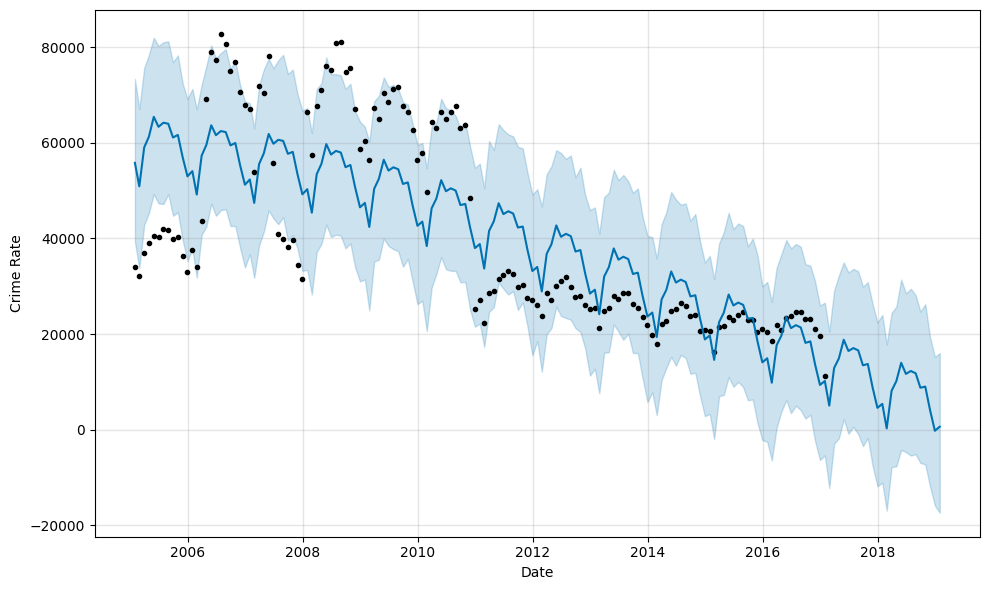

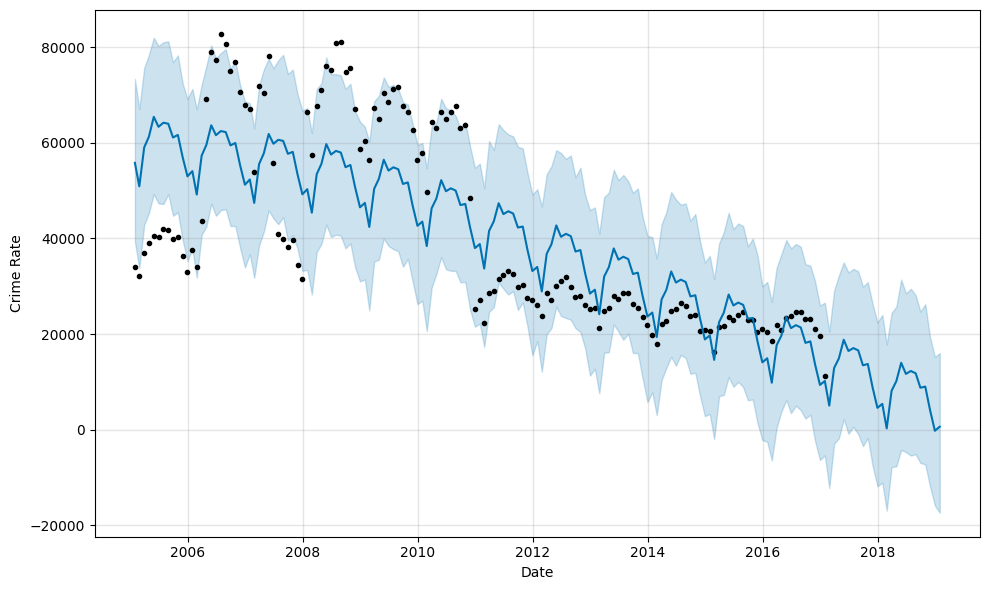

In [47]:
m.plot(forcast,xlabel="Date",ylabel="Crime Rate")

### Saving the Trained Prophet Model to a JSON File

In [48]:
import json
from prophet.serialize import model_to_json, model_from_json

with open('prophet_model.json', 'w') as fout:
    json.dump(model_to_json(m), fout)  # Save model

### Loading the Saved Prophet Model from a JSON File

In [49]:
with open('prophet_model.json', 'r') as fin:
    m1 = model_from_json(json.load(fin))  # Load model


### Taking User Input for the Number of Months to Forecast

In [57]:
x = 24

### Making Future Predictions Based on User Input for Number of Months

In [54]:
pred = m1.make_future_dataframe(periods=x ,freq = "M")
forcast = m1.predict(pred)

### Displaying the Forecasted Results Based on User-Defined Future Periods

In [55]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60511.268500,38546.840355,71420.827985,60511.268500,60511.268500,-4715.447896,-4715.447896,-4715.447896,-4715.447896,-4715.447896,-4715.447896,0.0,0.0,0.0,55795.820604
1,2005-02-28,60378.850602,32949.869075,67196.634998,60378.850602,60378.850602,-9482.034751,-9482.034751,-9482.034751,-9482.034751,-9482.034751,-9482.034751,0.0,0.0,0.0,50896.815851
2,2005-03-31,60232.245072,43749.262995,75820.401347,60232.245072,60232.245072,-1209.007718,-1209.007718,-1209.007718,-1209.007718,-1209.007718,-1209.007718,0.0,0.0,0.0,59023.237354
3,2005-04-30,60090.368753,44382.618912,78933.384949,60090.368753,60090.368753,1173.355959,1173.355959,1173.355959,1173.355959,1173.355959,1173.355959,0.0,0.0,0.0,61263.724711
4,2005-05-31,59943.763223,49513.525703,81663.522892,59943.763223,59943.763223,5476.887813,5476.887813,5476.887813,5476.887813,5476.887813,5476.887813,0.0,0.0,0.0,65420.651036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2018-09-30,6961.825072,-8296.357555,26576.588501,6595.616450,7317.086361,1814.022682,1814.022682,1814.022682,1814.022682,1814.022682,1814.022682,0.0,0.0,0.0,8775.847754
165,2018-10-31,6556.652876,-7884.160597,26809.531075,6168.350920,6942.434954,2458.481072,2458.481072,2458.481072,2458.481072,2458.481072,2458.481072,0.0,0.0,0.0,9015.133948
166,2018-11-30,6164.550750,-12247.257015,20193.134222,5739.780612,6576.271227,-2014.133249,-2014.133249,-2014.133249,-2014.133249,-2014.133249,-2014.133249,0.0,0.0,0.0,4150.417501
167,2018-12-31,5759.378554,-16875.813751,16500.390695,5306.935151,6203.697963,-5978.273837,-5978.273837,-5978.273837,-5978.273837,-5978.273837,-5978.273837,0.0,0.0,0.0,-218.895283


### Plotting the Forecasted Crime Rates for the User-Defined Future Periods

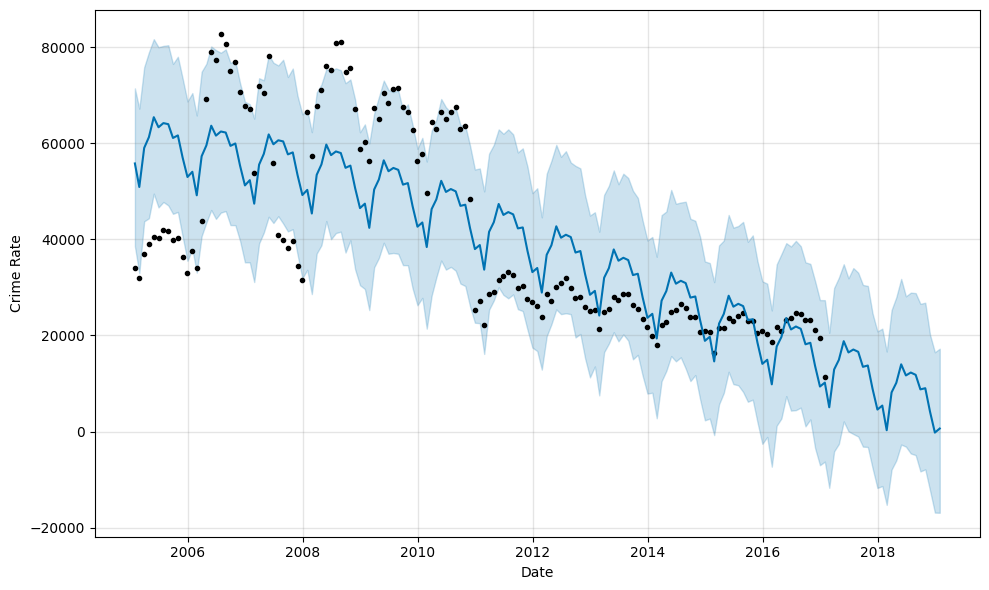

In [56]:
figure = m1.plot(forcast, xlabel='Date', ylabel='Crime Rate')